In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

teams = pd.read_json('C:\\Users\\Gabriele\\Desktop\\datasets\\teams.json')
england = pd.read_json('C:\\Users\\Gabriele\\Desktop\\datasets\\matches_Spain.json')


In [6]:
for i in range(len(teams)):
    
    if teams.loc[i, 'type'] != 'club':
        teams = teams.drop(i)
        
    elif teams.loc[i, 'area']['name'] != 'Spain':
        teams = teams.drop(i)
        
teams = teams.reset_index(drop=True)   # reset indexes


points_teams = {}

for index1 in range(len(teams)):
    points_teams[teams.loc[index1, 'name']] = [0]
    
    for index2 in range(1,39): 
            
            for index3 in range(len(england)):
                if england.loc[index3, 'gameweek'] == index2:
                    
                    if ((teams.loc[index1, 'name'] in england.loc[index3, 'label']) == True):
                        if (england.loc[index3, 'winner'] == teams.loc[index1, 'wyId']):
                            points_teams[teams.loc[index1, 'name']].append(3 + points_teams[teams.loc[index1, 'name']][index2 -1])
                            
                        elif (england.loc[index3, 'winner'] == 0):
                            points_teams[teams.loc[index1, 'name']].append(1 + points_teams[teams.loc[index1, 'name']][index2 -1])
                        
                        elif (england.loc[index3, 'winner'] != teams.loc[index1, 'wyId']):
                            points_teams[teams.loc[index1, 'name']].append(points_teams[teams.loc[index1, 'name']][index2 -1])

teams

,area,city,name,officialName,type,wyId
0,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vigo,Celta de Vigo,Real Club Celta de Vigo,club,692
1,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Espanyol,Reial Club Deportiu Espanyol,club,691
2,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vitoria-Gasteiz,Deportivo Alav\u00e9s,Deportivo Alav\u00e9s,club,696
3,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Valencia,Levante,Levante UD,club,695
4,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Getafe (Madrid),Getafe,Getafe Club de F\u00fatbol,club,698
5,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Bilbao,Athletic Club,Athletic Club Bilbao,club,678
6,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Madrid,Atl\u00e9tico Madrid,Club Atl\u00e9tico de Madrid,club,679
7,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Valencia,Valencia,Valencia Club de F\u00fatbol,club,674
8,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Madrid,Real Madrid,Real Madrid Club de F\u00fatbol,club,675
9,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Barcelona,FC Barcelona,club,676


In [7]:
win_max = {}
lose_max = {}

for key, value in points_teams.items():
    win_max[key] = 0
    count = 0
    for j in range(len(value)-1):
        if value[j+1] - value[j] == 3:
            count += 1
            if count > win_max[key]:
                win_max[key] = count
        else:
            count = 0
            
            
for key, value in points_teams.items():
    lose_max[key] = 0
    count = 0
    for j in range(len(value)-1):
        if value[j+1] - value[j] == 0:
            count += 1
            if count > lose_max[key]:
                lose_max[key] = count
        else:
            count = 0

In [8]:
list_win = []
list_lose = []

key_max1 = max(win_max.keys(), key=(lambda k: win_max[k]))
key_max2 = max(lose_max.keys(), key=(lambda k: lose_max[k]))
list_win.append(key_max1)
list_lose.append(key_max2)


del win_max[key_max1]
del lose_max[key_max2]


key_max1 = max(win_max.keys(), key=(lambda k: win_max[k]))
key_max2 = max(lose_max.keys(), key=(lambda k: lose_max[k]))
list_win.append(key_max1)
list_lose.append(key_max2)

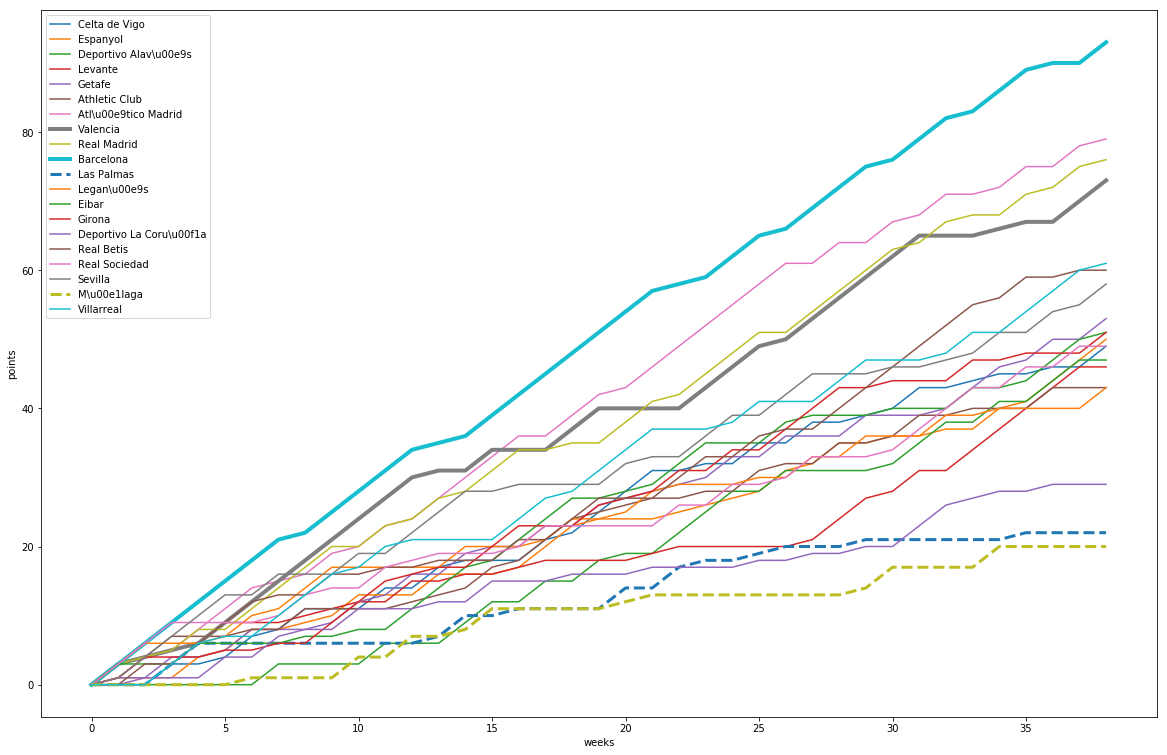

In [10]:
plt.figure(figsize=(20,13))
for index4 in range(len(points_teams)): 
    
    if teams.loc[index4, 'name'] in list_win:
        plt.plot(points_teams[teams.loc[index4, 'name']], linewidth=4 ,label = teams.loc[index4, 'name']) 
        
    elif teams.loc[index4, 'name'] in list_lose:
        plt.plot(points_teams[teams.loc[index4, 'name']],'--', linewidth=3, label = teams.loc[index4, 'name'])
    
    else:
        plt.plot(points_teams[teams.loc[index4, 'name']], label = teams.loc[index4, 'name']) 
        
plt.xlabel('weeks')  
plt.ylabel('points')
plt.legend()
plt.show() 